In [4]:
import numpy as np
from matplotlib import pylab
from pylab import *

In [7]:
from IPython.display import Image
Image(url='http://www.viralml.com/static/images/reinforcement-learning/looking-for-honey.png')

In [8]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]



/home/akhil/.virtualenvs/qlearning/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


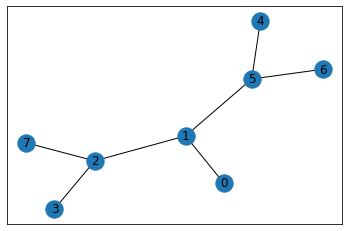

In [10]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [11]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [12]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [13]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R


(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [14]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

In [15]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [16]:
available_act = available_actions(initial_state)
available_act

array([0, 2, 5])

In [23]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)
action

5

In [25]:
def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

max_value 0.0


0

In [26]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value 244.0
Score: 173.77049180327867
max_value 244.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value 195.20000000000002
Score: 253.77049180327867
max_value 195.20000000000002
Score: 253.77049180327867
max_value 0.0
Score: 253.77049180327867
max_value 0.0
Score: 253.77049180327867
max_value 0.0
Score: 253.77049180327867
ma

max_value 251.60736906744802
Score: 978.1795974261604
max_value 395.607369067448
Score: 978.1795974261604
max_value 251.60736906744802
Score: 978.1795974261604
max_value 251.60736906744802
Score: 978.1795974261604
max_value 251.60736906744802
Score: 978.1795974261604
max_value 316.48589525395846
Score: 978.5784381301169
max_value 395.607369067448
Score: 978.5784381301169
max_value 496.48589525395846
Score: 977.02380350267
max_value 251.60736906744802
Score: 977.02380350267
max_value 316.48589525395846
Score: 977.02380350267
max_value 395.607369067448
Score: 977.02380350267
max_value 316.48589525395846
Score: 977.02380350267
max_value 395.607369067448
Score: 977.02380350267
max_value 251.60736906744802
Score: 977.02380350267
max_value 497.1887162031668
Score: 975.784051509175
max_value 251.60736906744802
Score: 975.784051509175
max_value 395.607369067448
Score: 975.784051509175
max_value 201.28589525395842
Score: 975.784051509175
max_value 201.28589525395842
Score: 975.784051509175
max_

max_value 319.07879852545375
Score: 981.2179431963605
max_value 255.26303882036302
Score: 981.2179431963605
max_value 499.5283448450324
Score: 981.1800536340202
max_value 499.5283448450324
Score: 981.1800536340202
max_value 255.26303882036302
Score: 981.1800536340202
max_value 319.07879852545375
Score: 981.1800536340202
max_value 204.21043105629042
Score: 981.1800536340202
max_value 319.07879852545375
Score: 981.1800536340202
max_value 399.62267587602594
Score: 981.3350353737349
max_value 255.26303882036302
Score: 981.3350353737349
max_value 319.6981407008208
Score: 981.4590207655067
max_value 255.26303882036302
Score: 981.4590207655067
max_value 399.62267587602594
Score: 981.6140025052214
max_value 399.62267587602594
Score: 981.6140025052214
max_value 204.21043105629042
Score: 981.6140025052214
max_value 399.62267587602594
Score: 981.7689842449361
max_value 255.75851256065664
Score: 981.8681725583534
max_value 255.26303882036302
Score: 981.8681725583534
max_value 499.5283448450324
Sco

Score: 982.6625803096026
max_value 319.9493564133607
Score: 982.6625803096026
max_value 399.95948513068856
Score: 982.6625803096026
max_value 499.95948513068856
Score: 982.6446983810911
max_value 255.95948513068856
Score: 982.6446983810911
max_value 399.95948513068856
Score: 982.6446983810911
max_value 319.9493564133607
Score: 982.6446983810911
max_value 319.9493564133607
Score: 982.6446983810911
max_value 255.95948513068856
Score: 982.6446983810911
max_value 255.95948513068856
Score: 982.6492566732456
max_value 499.9675881045509
Score: 982.6349515782224
max_value 255.95948513068856
Score: 982.6349515782224
max_value 255.95948513068856
Score: 982.6349515782224
max_value 319.9493564133607
Score: 982.6349515782224
max_value 319.9493564133607
Score: 982.6349515782224
max_value 255.95948513068856
Score: 982.6349515782224
max_value 204.76758810455087
Score: 982.6349515782224
max_value 319.9493564133607
Score: 982.6349515782224
max_value 319.9493564133607
Score: 982.6349515782224
max_value 3

Most efficient path:
[0, 1, 2, 7]


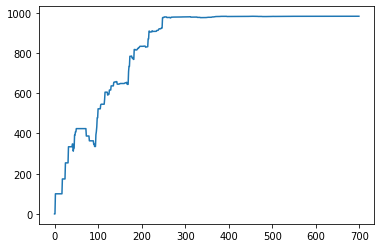

In [37]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()